In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Shape of Data: (3710, 14)
First few rows:
         Date  Crypto Volatility  Crypto Growth  Bonds Volatility  \
0  2010-07-19            0.01584       -0.00504          0.043850   
1  2010-07-20            0.00755       -0.00606          0.036574   
2  2010-07-21            0.01287        0.00447          0.037135   
3  2010-07-22            0.03131       -0.02871          0.042159   
4  2010-07-23            0.01717        0.01212          0.041130   

   Bonds Growth  Major Currencies Volatility  Major Currencies Growth  \
0     -0.001233                     2.232157                -1.335385   
1     -0.016573                     2.213713                 1.139422   
2     -0.025235                     1.920781                 0.361047   
3     -0.018359                     1.666740                 0.054496   
4     -0.013021                     2.040011                -0.325834   

   Other Currencies Volatility  Other Currencies Growth  Indices Volatility  \
0                     0.1

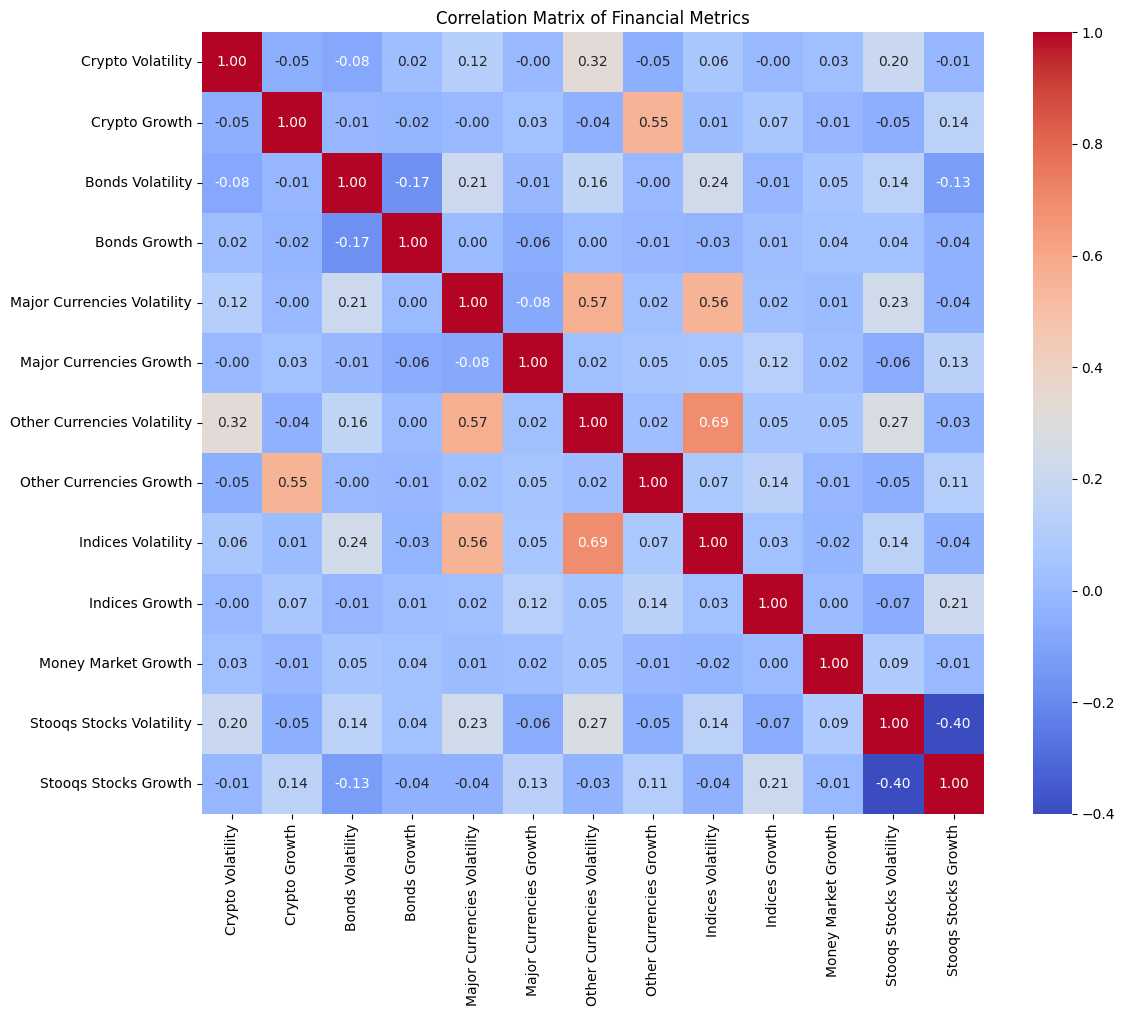

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from Google Drive
file_path = "/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Shape of Data:", df.shape)
print("First few rows:")
print(df.head())

# Drop Date column since it's not numeric
df_numeric = df.drop(columns=["Date"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

#  highlight strong correlations (absolute value > 0.7)
strong_corr = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)]
print("\nStrong Correlations (|corr| > 0.7):")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Financial Metrics")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the data
df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv")
# Drop non-numeric column
df = df.drop(columns=["Date"])

# Choose target and selected predictors
target = "Other Currencies Volatility"
features = ["Stooqs Stocks Volatility", "Indices Volatility", "Major Currencies Volatility"]

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))


Mean Squared Error: 920695.5436151354
R² Score: 0.5973595426673814
Intercept: -377.18608399146274
Coefficients: {'Stooqs Stocks Volatility': np.float64(50.64895550796027), 'Indices Volatility': np.float64(2.682827581200111), 'Major Currencies Volatility': np.float64(12.320898438523907)}


# Poor score, move to other models

Lasso MSE: 767263.7299246539
Lasso R²: 0.6644586570946505

Top Lasso Predictors:
Indices Volatility             870.571323
Major Currencies Volatility    348.721089
Crypto Volatility              341.448734
Stooqs Stocks Volatility       179.804813
Stooqs Stocks Growth            74.479410
dtype: float64


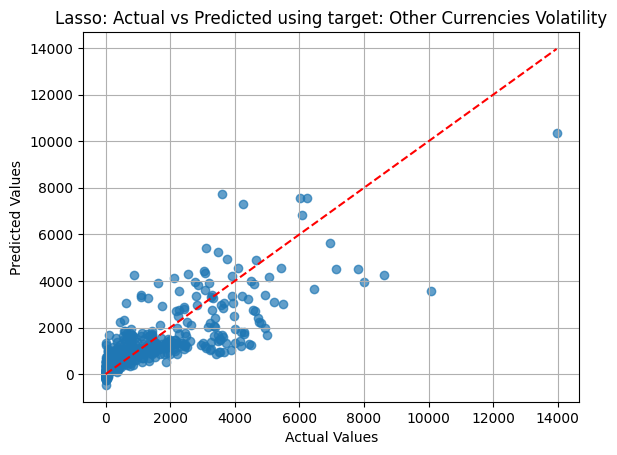

In [9]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv")
df = df.drop(columns=["Date"])

# Target and features
target = "Other Currencies Volatility"
X = df.drop(columns=[target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Lasso model
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluate
print("Lasso MSE:", mean_squared_error(y_test, y_pred))
print("Lasso R²:", r2_score(y_test, y_pred))

# Coefficients (non-zero = selected features)
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nTop Lasso Predictors:")
print(coefficients[coefficients != 0].sort_values(ascending=False).head())

# Plot predictions vs actuals
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso: Actual vs Predicted using target: Other Currencies Volatility")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal
plt.grid(True)
plt.show()


RF MSE: 306249.2594451339
RF R²: 0.8660704477871252

Top Predictors:
Indices Volatility          0.450470
Crypto Volatility           0.383705
Other Currencies Growth     0.084598
Stooqs Stocks Volatility    0.018381
Bonds Volatility            0.016498
dtype: float64


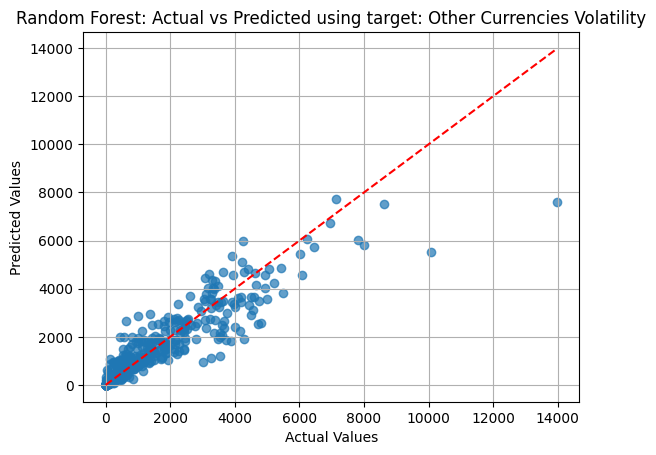

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load data
df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv")
df = df.drop(columns=["Date"])

# Target and features
target = "Other Currencies Volatility"
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("RF MSE:", mean_squared_error(y_test, y_pred))
print("RF R²:", r2_score(y_test, y_pred))

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nTop Predictors:")
print(importances.sort_values(ascending=False).head())

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted using target: Other Currencies Volatility")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal
plt.grid(True)
plt.show()



Params: {'n_estimators': 50, 'max_depth': None}, MSE=308438.14, R²=0.8651
Params: {'n_estimators': 100, 'max_depth': None}, MSE=306249.26, R²=0.8661
Params: {'n_estimators': 200, 'max_depth': None}, MSE=304418.04, R²=0.8669
Params: {'n_estimators': 50, 'max_depth': 5}, MSE=343044.98, R²=0.8500
Params: {'n_estimators': 100, 'max_depth': 5}, MSE=332695.02, R²=0.8545
Params: {'n_estimators': 200, 'max_depth': 5}, MSE=333831.94, R²=0.8540
Params: {'n_estimators': 50, 'max_depth': 10}, MSE=311662.44, R²=0.8637
Params: {'n_estimators': 100, 'max_depth': 10}, MSE=297713.90, R²=0.8698
Params: {'n_estimators': 200, 'max_depth': 10}, MSE=302152.84, R²=0.8679

Best Params: {'n_estimators': 100, 'max_depth': 10} with R²=0.8698


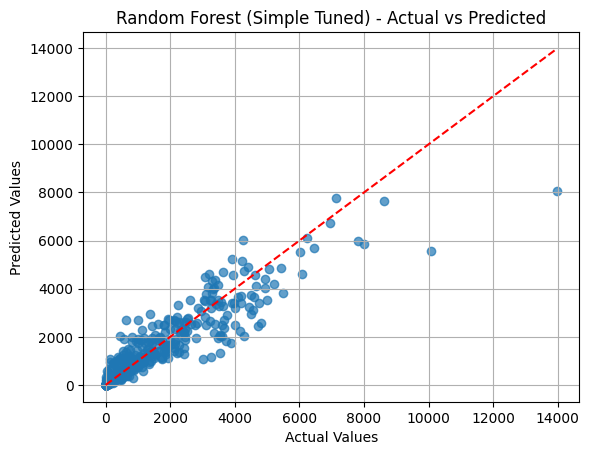


Top Predictors:
Indices Volatility          0.455158
Crypto Volatility           0.387498
Other Currencies Growth     0.084073
Stooqs Stocks Volatility    0.017422
Bonds Volatility            0.014995
dtype: float64


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv")
df = df.drop(columns=["Date"], errors="ignore")

target = "Other Currencies Volatility"
X = df.drop(columns=[target])
y = df[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define parameter combos to try
#
param_list = [
    {"n_estimators": 50,  "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": None},

    {"n_estimators": 50,  "max_depth": 5},
    {"n_estimators": 100, "max_depth": 5},
    {"n_estimators": 200, "max_depth": 5},

    {"n_estimators": 50,  "max_depth": 10},
    {"n_estimators": 100, "max_depth": 10},
    {"n_estimators": 200, "max_depth": 10},
]

best_r2 = float("-inf")
best_model = None
best_params = None

# 4. Loop over parameter combos
for params in param_list:
    # Create and train model
    rf_model = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        random_state=42
    )
    rf_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Params: {params}, MSE={mse:.2f}, R²={r2:.4f}")

    # Track best
    if r2 > best_r2:
        best_r2 = r2
        best_model = rf_model
        best_params = params

# 5. Print best result
print("\nBest Params:", best_params, f"with R²={best_r2:.4f}")

# 6. Plot predictions vs actuals using the best model
y_pred_best = best_model.predict(X_test)
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest (Simple Tuned) - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# 7. Show top 5 features
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Predictors:")
print(importances.head(5))
